<a href="https://colab.research.google.com/github/jnod20/.jnod20.github.io/blob/main/TFDecisionForests_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow_decision_forests as tfdf


In [4]:
!pip install tensorflow_decision_forests

In [6]:
# Load dataset from Seaborn
data = sns.load_dataset("penguins")

In [7]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [10]:
# Drop rows with missing values
data.dropna(inplace=True)

In [11]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [13]:
# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

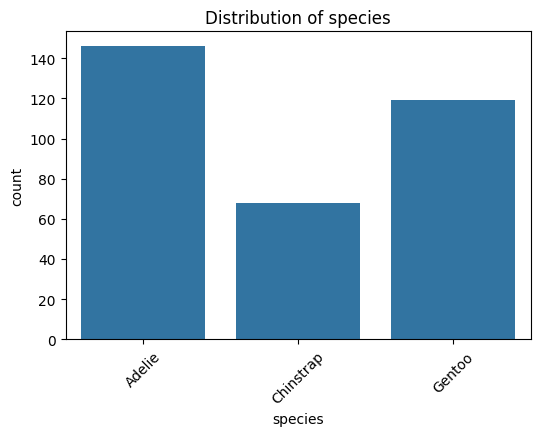

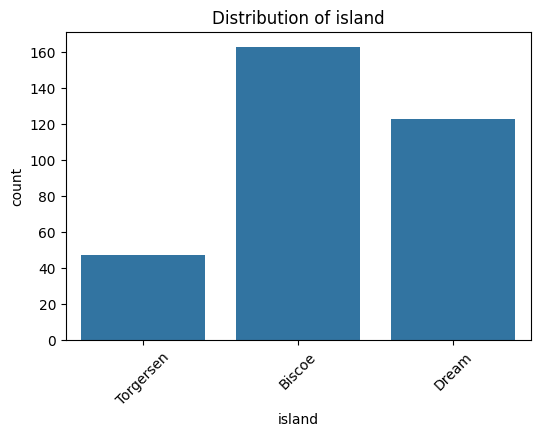

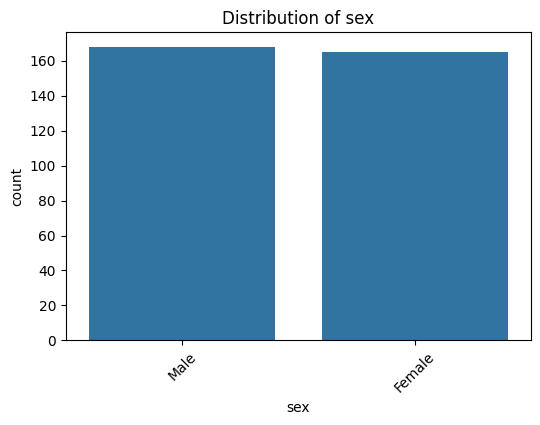

In [14]:
# Plotting each categorical variable
for col in categorical_cols:
  plt.figure(figsize=(6, 4))
  sns.countplot(data=data, x=col)
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=45) # Rotates labels to avoid overlap
  plt.show()

In [ ]:
# Seperate numeric and categorical data
numeric_features = data.select_dtypes(include=['float64', 'int']).columns.difference(['species'])

# Boxplots for each Numeric Feature against Species
for feature in numeric_features:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x='species', y=feature, data=data)
